<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Qiskit_Runtime_Primitives_Sampler_and_Estimator_mkbahk_20241008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Qiskit 설치: Windows, 클라우드 환경 ###
%pip install qiskit[visualization]==1.1.0
%pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.1 MB/s eta 0:00:00


In [ ]:
%pip show qiskit qiskit-ibm-runtime

Name: qiskit
Version: 1.1.0
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-ibm-runtime
---
Name: qiskit-ibm-runtime
Version: 0.30.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: https://github.com/Qiskit/qiskit-ibm-runtime
Author: Qiskit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ibm-platform-services, numpy, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3, websocket-client
Required-by: 


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import Layout, CouplingMap
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2, EstimatorV2, Options
from qiskit_ibm_runtime.fake_provider import FakeManilaV2


In [ ]:
# Define a simple circuit
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()

In [ ]:
# Define observables for the Estimator
observables = [SparsePauliOp("ZZ"), SparsePauliOp("ZI")]

In [ ]:
# Set up the fake backend
fake_manila = FakeManilaV2()

In [ ]:
# Get the coupling map and create an initial layout
coupling_map = CouplingMap(fake_manila.configuration().coupling_map)
initial_layout = Layout.generate_trivial_layout(*circuit.qubits)
initial_layout = initial_layout.from_intlist(
    [i for i in range(circuit.num_qubits)], *circuit.qregs
)

In [ ]:
# Create a transpiler pass manager
pass_manager = generate_preset_pass_manager(
    optimization_level=1, backend=fake_manila, initial_layout=initial_layout
)

# Transpile the circuit for the fake backend
transpiled_circuit = pass_manager.run(circuit)

In [ ]:
# --- Run with Sampler ---
# Create a Sampler instance and run the job
sampler = SamplerV2(fake_manila)
job_sampler = sampler.run([transpiled_circuit])

# Get the results
result_sampler = job_sampler.result()
print("Sampler Results:")
print(result_sampler)

Sampler Results:
PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=2>)))], metadata={})


/usr/local/lib/python3.10/dist-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


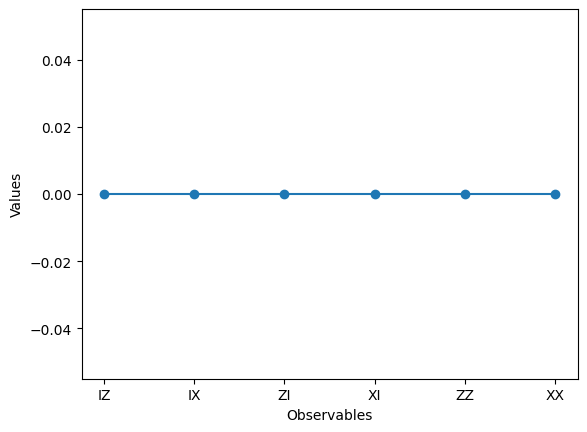

In [ ]:
# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']

# Access quasi-probabilities using bracket notation
values = [result_sampler[0].data[observable] if observable in result_sampler[0].data else 0 for observable in data]

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()

In [ ]:
# --- Run with Estimator ---
# Apply layout to the observables
observables_isa = [observable.apply_layout(transpiled_circuit.layout) for observable in observables]

# Create an Estimator instance and run the job
estimator = EstimatorV2(fake_manila)
job_estimator = estimator.run([(transpiled_circuit, obs) for obs in observables_isa])
8
# Get the results
result_estimator = job_estimator.result()
print("\nEstimator Results:")
print(result_estimator)


Estimator Results:
PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=0.0), metadata={'target_precision': 0.015625}), PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=0.015623927079556978), metadata={'target_precision': 0.015625})], metadata={})


/usr/local/lib/python3.10/dist-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


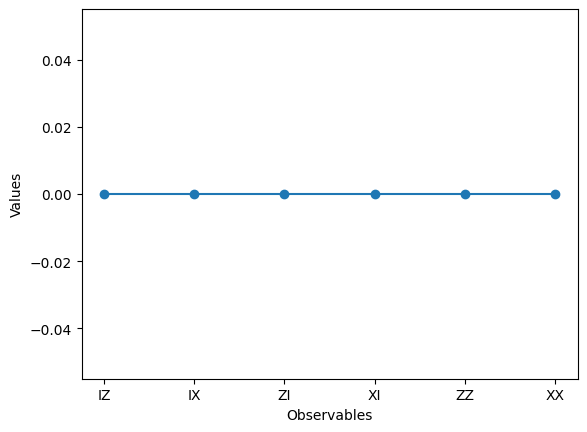

In [ ]:
# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']

# Access quasi-probabilities using bracket notation
values = [result_estimator[0].data[observable] if observable in result_estimator[0].data else 0 for observable in data]

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()